In [1]:
import os

import numpy as np
import polars as pl
import seaborn as sns

from vitara.io.config import setup
from vitara.io.read_file import read_spectrum_into_np, read_dataframe
from vitara.processing.conversion import linear_map, posn_to_time, map_wavelength
from vitara.processing.trial import VitaraTrial, VerticalUnits

In [2]:
setup(os.path.abspath("config.yml"))

In [3]:
def plot_run(trial: VitaraTrial, separator: str="\t"):
    """
    Plots the spectrum for one run from LabView

    args
    ----
    trial: VitaraTrial
        The VitaraTrial instance containing all the information about this trial
    separator: str (optional)
        Override tab separated values with different separator

    returns
    -------
    (void)
    """

    dataframes = [read_dataframe(folder, separator) for folder in trial.folder_names] # TODO: Make it do wavenumbers
    dataframe = sum(dataframes[1:], start=dataframes[0]) / len(dataframes)
    ax = sns.heatmap(dataframe, cmap=trial.cmap)
    ax.tick_params(axis='x', rotation=90) # Make the x ticks more readable

    ax.set_xlabel(trial.figure_x_label)
    ax.set_ylabel(VerticalUnits.to_string(trial.vertical_units))
    ax.set_title(trial.figure_title)

    # X ticks
    ax.set_xticks(np.arange(0, np.max(ax.get_xticks()), trial.x_tick_rate))
    ax.set_xticklabels([round(posn_to_time(x, trial.step_size)) for i, x in enumerate(ax.get_xticks())])

    # Y ticks
    ax.set_yticks(np.arange(0, np.max(ax.get_yticks()), trial.y_tick_rate))
    ax.set_yticklabels([map_wavelength(x, trial.min_wavelength, trial.wavelength_per_n_pixels) for x in ax.get_yticks()])

    # TODO: adjust x axis to be centered using autocorrelation stuff
    ax.set_xlim([15,75]) # optional to center on signal
    ax.set_ylim([1130,970]) # optional to center on signal

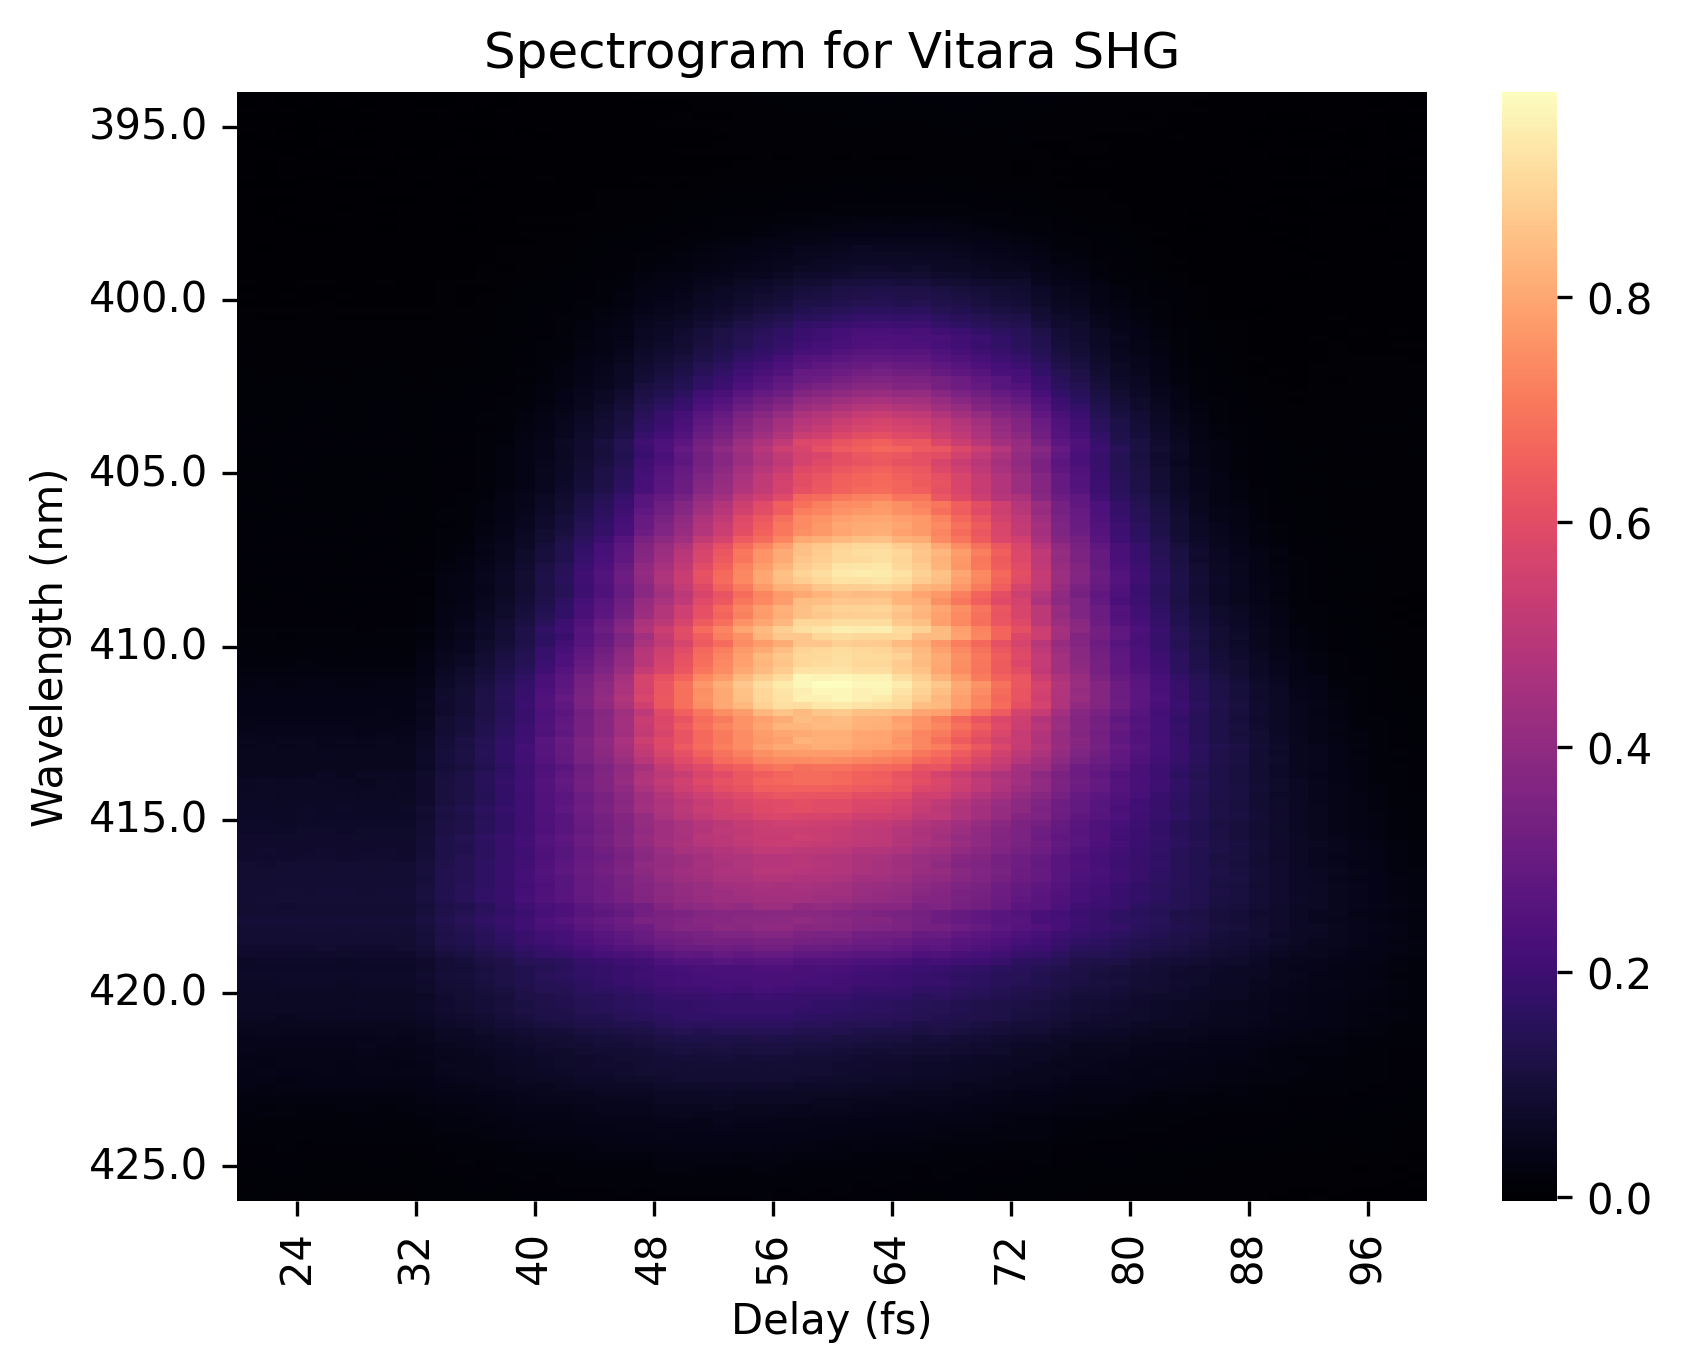

In [8]:
plot_run(VitaraTrial(
    folder_names=["run_1", "run_2", "run_3", "run_4"],
    figure_title="Spectrogram for Vitara SHG",
    figure_x_label="Delay (fs)",
    vertical_units=VerticalUnits.WAVELENGTH,
    wavelength_per_n_pixels=(100,500),
    step_size=0.0002,
    min_wavelength=200,
    x_tick_rate=6, # TODO: Make the numbers make sense
    y_tick_rate=25,
))